# S4 - Stocks 

El challenge de esta semana trata sobre predicción del precio de stocks basandonos en el conjunto de datos de **NYSE**, que podéis encontrar aquí:

[NYSE Dataset](https://www.kaggle.com/dgawlik/nyse)


Usaremos el archivo csv _prices_ , que contiene el histórico de los valores tal y como son. La descripción de los valores de cada columna los tenéis en la propia página de kaggle :)

### Carga de librerías

In [1]:
# os hemos dejado ya las librerias ;)

import numpy as np 
import pandas as pd 
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.


#### Carga del archivo de datos y vistacillo (head)

In [2]:
# Carga del archivo
prices_dataset =  

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


#### Elegir stock:

De todos los stocks que tenéis disponibles, elegid el símbolo que queráis. El símbolo es el código de letras que identifica a las distintas compañías en los distintos índices. En el caso que nos ocupa, los datos se han sacado de NASDAQ.

[¿NASDAQ? ¿Wut?](https://en.wikipedia.org/wiki/Nasdaq)

In [3]:
# Elegir stock, yo usé yahoo
yahoo = prices_dataset[prices_dataset['symbol']==]

# Coger solo los valores, poned bien el tipo
stock_prices = 
# Dadle la forma adecuada 
stock_prices = 
# Comprueba que ha ido bien ;)
stock_prices.shape

(1762, 1)

#### Pintar gráfica

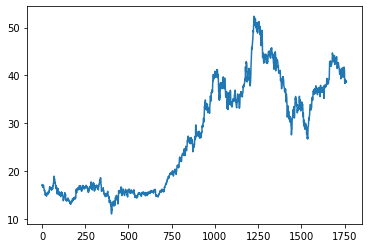

In [4]:
# podeis utilizar matplotlib os si os hace más usar seaborn sois totalmente libres :)

#### Escalado

Tened en cuenta que para un funcionamiento óptimo los valores a predecir y predictores deben estar en un rango adecuado


In [0]:
# Podéis hacer un escalado a vuestra manera, si no os apetece explorar mucho, sklearn os ofrece varios por defecto
scaler = 
stock_prices = 

#### Train/test split

Ojito cuidado. Recordar que el train/test split por defecto de sklearn, por bueno que sea, toma muestras de una manera aleatoria, así que el separado de datos en este caso debe ser en un punto concreto


In [6]:
# Completar tamaños y partir
train_size = 
test_size = 
train, test = 
print(len(train), len(test))

1409 353


#### Crear el conjunto de datos

Os dejamos esta función base para que veáis cómo se puede preparar el conjunto de datos para introducirlo en el modelo. El parámetro `look_back` os permite definir cuantos dias hacia atrás va a poder ver la red para efectuar su predicción. 

In [0]:
# Si funciona, ¿para qué tocas? ;) 

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

Aquí tenéis libertad para definir esa vista hacia atrás, esto es elección de cada uno. Haciendo distintas pruebas de entrenamiento podréis configurar el valor que veáis que produce mejores resultados.

In [0]:
# Decidir el valor de look_back
look_back = 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#### Input para la LSTM

Las LSTM requieren un input en 3 dimensiones, asi que es necesario recolocarlo y añadir dimensiones.

In [0]:
# y ya 'tá

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### Creación del modelo

Tened en cuenta los tamaños de entrada y salida. Además, como función pérdida os recomendamos ``mse``, pero podéis elegir otras alternativas:

[Métricas keras](https://keras.io/losses/)


Os recomendamos una sola capa de LSTM, no debería ser necesario más, pero en caso de que si queráis añadir más, leed bien la documentación de Keras para saber qué parámetros de respuesta de la capa LSTM tenéis que modificar.


In [11]:
model = Sequential()

# Rellenar

start = time.time()
model.compile(loss='mse', optimizer='adam')
print ('compilation time : ', time.time() - start)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 4), units=50)`
  



compilation time :  0.022571325302124023


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  if sys.path[0] == '':


In [12]:
history = model.fit(trainX,trainY,batch_size=,epochs = ,validation_split=0.05)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1333 samples, validate on 71 samples
Epoch 1/300





1333/1333 [==============================] - 10s 8ms/step - loss: 0.1538 - val_loss: 0.3778
Epoch 2/300
1333/1333 [==============================] - 0s 64us/step - loss: 0.0974 - val_loss: 0.2026
Epoch 3/300
1333/1333 [==============================] - 0s 64us/step - loss: 0.0411 - val_loss: 0.0399
Epoch 4/300
1333/1333 [==============================] - 0s 87us/step - loss: 0.0172 - val_loss: 5.7997e-04
Epoch 5/300
1333/1333 [==============================] - 0s 66us/step - loss: 0.0143 - val_loss: 0.0039
Epoch 6/300
1333/1333 [==============================] - 0s 62us/step - loss: 0.0084 - val_loss: 0.0072
Epoch 7/300
1333/1333 [==============================] - 0s 65us/step - loss: 0.0058 - val_loss: 8.8787e-04
Epoch 8/300
1333/1333 [==============================] - 0s 67us/step - loss: 0.0033 - val_loss: 5.5534e-04
Epoch 9/

### Representación del modelo y valores de pérdida 

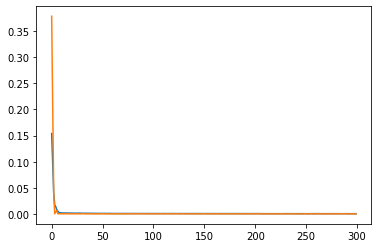

In [13]:
# Podéis cambiarlo para dibujar en seaborn que es algo más mono
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Representar (bien) las predicciones 

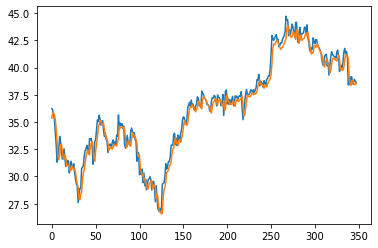

In [14]:
Xt = model.predict(testX)
# Añadid el dibujo y dibujad las predicciones bien hechas 




In [15]:
from sklearn.metrics import r2_score

# cuidado con lo que metéis ahi ;)

r2_score(,)

0.9697014861091255

#### Evaluación en cadena

Evaluad la salida del modelo y añadidlo a la entrada del siguiente paso para predecir 6 dias consecutivos usando el mismo modelo.

In [0]:
a =np.reshape(testX[0],(1,1,testX[0].shape[1]))
lista = []
for i in range(0,6):
  b = # prediccion
  a = # coger solo los ultimos tres
  a = # añadir b en cuarto lugar
  a = # reescalar 
  lista.append(b)

#### Valor de R2 para esos 6 dias

In [19]:
# Rellenar
r2_score( ,)

0.0

#### Representación de las predicciones vs los valores esperados esos 6 dias

In [ ]:
# Dibujicos!!

#### Crear dataset 2

Crear conjunto de datos para predecir en cada paso los ``future_steps`` dias siguientes

In [0]:
def create_dataset_2(dataset, look_back,future_steps):
    # TODO 


#### Nuevo conjunto de datos para predicción

In [ ]:
# Definir los dos parámetros
look_back = 
future_steps = 
trainX, trainY = create_dataset_2(train, look_back,future_steps)
testX, testY = create_dataset_2(test, look_back,future_steps)

#### Corregir las dimensiones

In [0]:
# Rellenad las dimensiones
trainX = np.reshape(trainX, )
testX = np.reshape(testX, )

#### Nuevo modelo con salida mayor

In [24]:
model = Sequential()

# Rellenar

model.compile(loss=, optimizer=)
print ('compilation time : ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 7), units=50)`
  


compilation time :  0.024686336517333984


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  if sys.path[0] == '':


In [25]:
# Decidid tamaño de batch, epochs.
history = model.fit(trainX,trainY,batch_size=,epochs = ,validation_split=0.05)

Train on 1328 samples, validate on 70 samples
Epoch 1/300
1328/1328 [==============================] - 1s 997us/step - loss: 0.1628 - val_loss: 0.4391
Epoch 2/300
1328/1328 [==============================] - 0s 69us/step - loss: 0.1247 - val_loss: 0.3030
Epoch 3/300
1328/1328 [==============================] - 0s 87us/step - loss: 0.0704 - val_loss: 0.1126
Epoch 4/300
1328/1328 [==============================] - 0s 73us/step - loss: 0.0217 - val_loss: 0.0013
Epoch 5/300
1328/1328 [==============================] - 0s 62us/step - loss: 0.0154 - val_loss: 0.0011
Epoch 6/300
1328/1328 [==============================] - 0s 60us/step - loss: 0.0094 - val_loss: 0.0079
Epoch 7/300
1328/1328 [==============================] - 0s 61us/step - loss: 0.0075 - val_loss: 0.0025
Epoch 8/300
1328/1328 [==============================] - 0s 62us/step - loss: 0.0052 - val_loss: 7.4471e-04
Epoch 9/300
1328/1328 [==============================] - 0s 58us/step - loss: 0.0041 - val_loss: 9.1445e-04
Epoch 10/

#### Nuevo valor de R2 para la nueva salida

In [26]:
# Colocad correctamente las predicciones para calcular el R2
from sklearn.metrics import r2_score
Xt = model.predict(testX)
r2_score(,)

0.9545250302065705